In [29]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import pickle
import plotly.express as px
import pandas as pd

In [30]:
word_embeddings = np.load('word_embeddings.npy')

In [31]:
with open('tokenizer.pkl', 'rb') as f:
    tokenizer = pickle.load(f)

word2idx = tokenizer.word_index
idx2word = tokenizer.index_word

num_words = 100
words_to_visualize = [word for word in list(tokenizer.word_index.keys()) if len(word) > 3 and word.isalpha()][:num_words] + ["Ron"]
indices = [tokenizer.word_index[word] for word in words_to_visualize]

vectors = word_embeddings[indices]

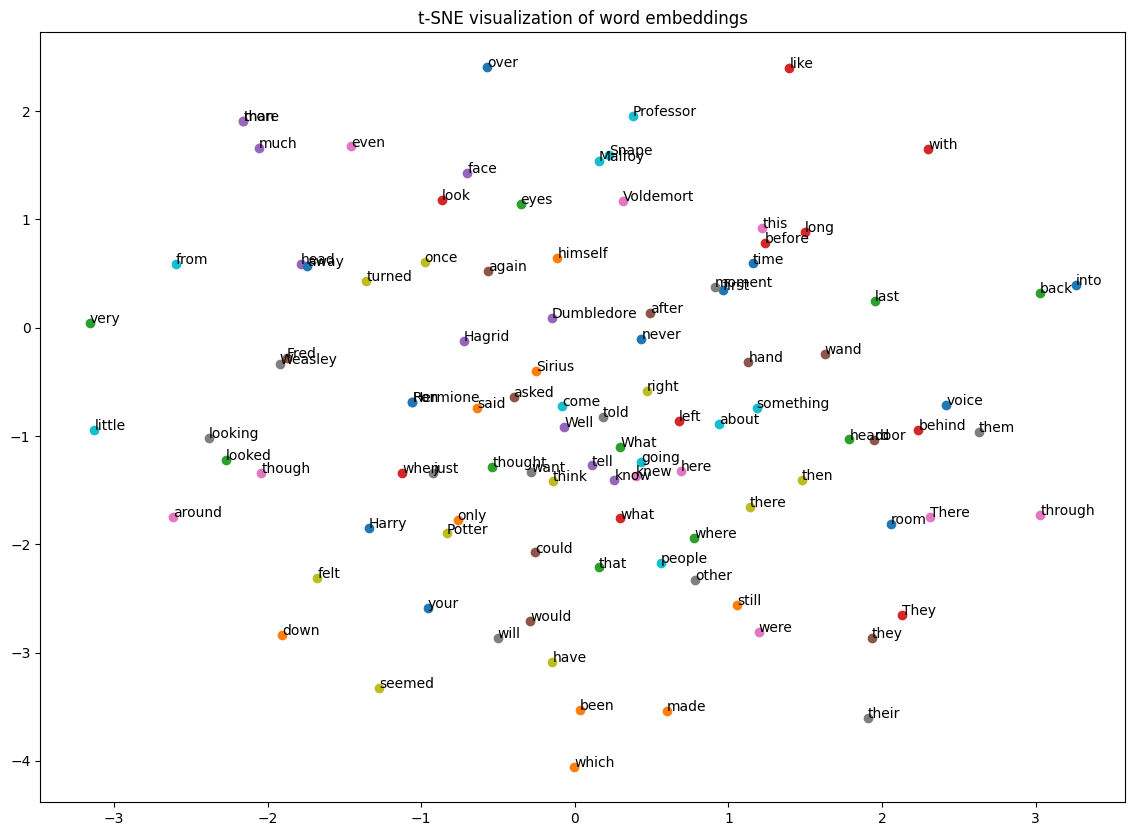

In [32]:
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
vectors_2d = tsne.fit_transform(vectors)

plt.figure(figsize=(14, 10))
for i, word in enumerate(words_to_visualize):
    x, y = vectors_2d[i]
    plt.scatter(x, y)
    plt.annotate(word, xy=(x, y))
plt.title('t-SNE visualization of word embeddings')
plt.show()

c:\Users\danie\dd2424-project\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

c:\Users\danie\dd2424-project\.venv\Lib\site-packages\umap\umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



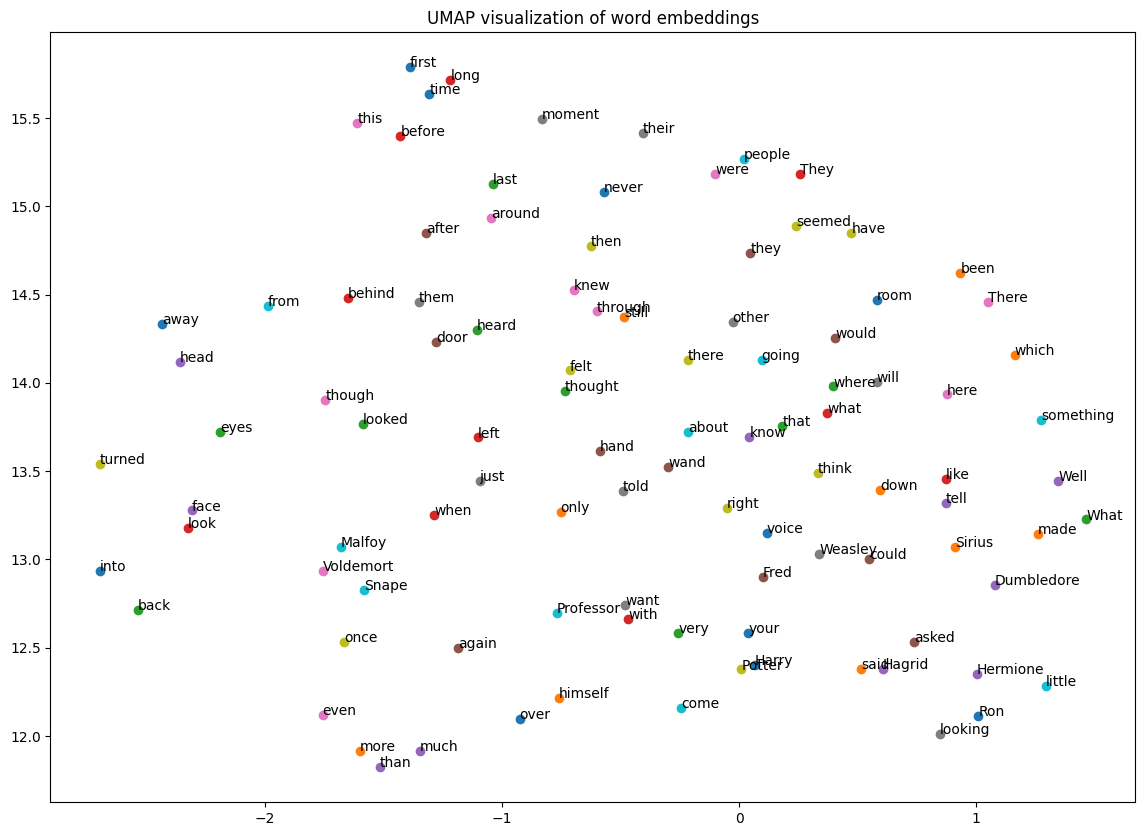

In [33]:
import umap.umap_ as umap

# Reduce dimensionality using UMAP
umap_reducer = umap.UMAP(n_components=2, random_state=42)
vectors_2d = umap_reducer.fit_transform(vectors)

# Plot the 2D word embeddings
plt.figure(figsize=(14, 10))
for i, word in enumerate(words_to_visualize):
    x, y = vectors_2d[i]
    plt.scatter(x, y)
    plt.annotate(word, xy=(x, y))
plt.title('UMAP visualization of word embeddings')
plt.show()

In [34]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
vectors_2d = pca.fit_transform(vectors)

# Create a DataFrame for easier plotting
df = pd.DataFrame(vectors_2d, columns=['x', 'y'])
df['word'] = words_to_visualize

# Interactive scatter plot
fig = px.scatter(df, x='x', y='y', text='word', title='PCA Word Embeddings', width=1200, height=1200)
fig.update_traces(textposition='top center')
fig.show()


In [111]:
import pandas as pd
import plotly.express as px
from sklearn.decomposition import PCA

# Define categories and corresponding colors
categories = {
    'Character': ['Harry', 'Potter', 'Ron', 'Ginny', 'Fred', 'Weasley', 'Hermione', 'Albus', 'Dumbledore', 'Voldemort', 'Snape', 'Malfoy', 'Hagrid', 'Professor'],
    'House': ['Gryffindor', 'Hufflepuff', 'Ravenclaw', 'Slytherin'],
    'Spell': ['Expelliarmus', 'Lumos', 'Patronus', 'Avada', 'Kedavra', 'Riddikulus', 'Alohomora', 'Crucio', 'Wand'],
    'Quidditch': ['Snitch', 'Broomstick', 'Quidditch', 'Nimbus', 'Bludger'],
    'Magical Creature': ['Hippogriff', 'Dementor', 'Dobby', 'Basilisk', 'Fenix', 'Hedwig', 'Fluffy', 'Aragog', 'Nagini'],
}

# Map each word to its category
word_category = {}
for category, words in categories.items():
    for word in words:
        word_category[word] = category

# Filter for words in your vocabulary
themed_words = [word for word in sum(categories.values(), []) if word in word2idx]
indices = [word2idx[word] for word in themed_words]

# Perform PCA to reduce the dimensionality of word embeddings
pca = PCA(n_components=2)
vectors_2d = pca.fit_transform(word_embeddings[indices])

# Create a DataFrame for plotting
df = pd.DataFrame({
    'x': vectors_2d[:, 0],
    'y': vectors_2d[:, 1],
    'word': themed_words,
    'Category': [word_category[word] for word in themed_words]  # Assign categories to words
})

category_colors = {
    'Character': 'red',
    'House': 'blue',
    'Spell': 'green',
    'Quidditch': 'purple',
    'Magical Creature': 'cyan',
}

# Map categories to colors
df['color'] = df['Category'].map(category_colors)

# Create the plot
fig = px.scatter(df, x='x', y='y', text='word', color='Category', 
                 color_discrete_map=category_colors, title='PCA Word Embedding Visualization', 
                 width=1400, height=1000)

fig.update_traces(textposition='top center', textfont=dict(size=13), marker=dict(size=9))
fig.update_layout(legend=dict(font=dict(size=15)))
fig.show()


In [37]:
def find_similar_words(word, top_n=10):
    if word not in word2idx:
        return "Word not in vocabulary"
    
    word_vec = word_embeddings[word2idx[word]]
    similarities = []
    
    for w, idx in word2idx.items():
        if w == word:
            continue
        vec = word_embeddings[idx]
        # Compute cosine similarity
        similarity = np.dot(word_vec, vec) / (np.linalg.norm(word_vec) * np.linalg.norm(vec))
        similarities.append((w, similarity))
    
    return sorted(similarities, key=lambda x: x[1], reverse=True)[:top_n]

print(find_similar_words("Harry"))
print(find_similar_words("magic"))

[('Potter', np.float32(0.48119104)), ('’', np.float32(0.45423225)), ('saw', np.float32(0.44326678)), ('his', np.float32(0.44048387)), ('”', np.float32(0.43158126)), ('said', np.float32(0.42360204)), ('.', np.float32(0.41982657)), ('watched', np.float32(0.41146013)), (',', np.float32(0.41144815)), ('missed', np.float32(0.4043578))]
[('spells', np.float32(0.5648972)), ('without', np.float32(0.54340416)), ('books', np.float32(0.5006368)), ('or', np.float32(0.49783078)), ('work', np.float32(0.46762118)), ('chance', np.float32(0.460945)), ('used', np.float32(0.4579078)), ('our', np.float32(0.45688578)), ('magical', np.float32(0.44003692)), ('spell', np.float32(0.4391756))]


In [38]:
def word_analogy(word_a, word_b, word_c):
    """Find word_d such that word_a is to word_b as word_c is to word_d"""
    if not all(w in word2idx for w in [word_a, word_b, word_c]):
        return "One or more words not in vocabulary"
        
    # word_a - word_b + word_c ≈ word_d
    vector = (word_embeddings[word2idx[word_a]] - 
              word_embeddings[word2idx[word_b]] + 
              word_embeddings[word2idx[word_c]])
    
    similarities = []
    for word, idx in word2idx.items():
        if word in [word_a, word_b, word_c]:
            continue
        similarity = np.dot(vector, word_embeddings[idx]) / (
            np.linalg.norm(vector) * np.linalg.norm(word_embeddings[idx]))
        similarities.append((word, similarity))
        
    return sorted(similarities, key=lambda x: x[1], reverse=True)[:5]

print(word_analogy("Harry", "Gryffindor", "Draco"))  # Should be Slytherin
print(word_analogy("Ron", "Weasley", "Harry"))
print(word_analogy("Hermione", "Granger", "Harry"))
print(word_analogy("Harry", "Potter", "Albus"))
print(word_analogy("Harry", "Potter", "Hermione"))
print(word_analogy("Harry", "Potter", "Ron"))

[('Malfoy', np.float32(0.4737602)), ('stare', np.float32(0.40633094)), ('spat', np.float32(0.39770177)), ('saw', np.float32(0.39546412)), ('Snape', np.float32(0.38640702))]
[('wished', np.float32(0.41491026)), ('missed', np.float32(0.38363796)), ('book', np.float32(0.38009918)), ('thought', np.float32(0.37723577)), ('stared', np.float32(0.37512305))]
[('said', np.float32(0.49534255)), ('Ron', np.float32(0.493519)), ('”', np.float32(0.45653135)), ('shaking', np.float32(0.43381172)), ('’', np.float32(0.4244003))]
[('turned', np.float32(0.4415521)), ('Aberforth', np.float32(0.39300066)), ('Dumbledore', np.float32(0.38893718)), ('Hagrid', np.float32(0.37877107)), ('suspected', np.float32(0.37813896))]
[('Ron', np.float32(0.5061267)), ('Ginny', np.float32(0.47598165)), ('climbed', np.float32(0.4612615)), ('nervously', np.float32(0.43695325)), ('”', np.float32(0.42681482))]
[('directions', np.float32(0.4388121)), ('turned', np.float32(0.4363258)), ('Ginny', np.float32(0.4327791)), ('hastily'

In [39]:
def word_addition(word_a, word_b):
    """Find word_c such that word_a + word_b ≈ word_c"""
    if not all(w in word2idx for w in [word_a, word_b]):
        return "One or more words not in vocabulary"
        
    vector = (word_embeddings[word2idx[word_a]] + 
              word_embeddings[word2idx[word_b]])
    
    similarities = []
    for word, idx in word2idx.items():
        if word in [word_a, word_b]:
            continue
        similarity = np.dot(vector, word_embeddings[idx]) / (
            np.linalg.norm(vector) * np.linalg.norm(word_embeddings[idx]))
        similarities.append((word, similarity))
        
    return sorted(similarities, key=lambda x: x[1], reverse=True)[:5]

print(word_addition("Harry", "Gryffindor"))
print(word_addition("Ron", "Weasley"))
print(word_addition("Hermione", "Granger"))
print(word_addition("Harry", "Potter"))

print(word_addition("boy", "scar"))
print(word_addition("Harry", "animal"))
print(word_addition("Harry", "owl"))
print(word_addition("Harry", "sock"))

[('team', np.float32(0.5763184)), ('match', np.float32(0.56488836)), ('Hufflepuff', np.float32(0.5252228)), ('Potter', np.float32(0.5204206)), ('common', np.float32(0.51128346))]
[('Mrs', np.float32(0.705292)), ('Mr', np.float32(0.67678267)), ('Percy', np.float32(0.63876635)), ('Fred', np.float32(0.56021655)), ('Hermione', np.float32(0.5458442))]
[('Miss', np.float32(0.63114256)), ('Ron', np.float32(0.5012057)), ('whispered', np.float32(0.49858943)), ('however', np.float32(0.49791902)), ('laughed', np.float32(0.49782676))]
[('Dobby', np.float32(0.5334249)), ('quietly', np.float32(0.46483988)), ('said', np.float32(0.46458265)), ('want', np.float32(0.45275232)), ('hadn', np.float32(0.44689947))]
[('man', np.float32(0.6292805)), ('happy', np.float32(0.56347024)), ('father', np.float32(0.555354)), ('mother', np.float32(0.55031663)), ('Is', np.float32(0.5445359))]
[('saw', np.float32(0.5158557)), ('closer', np.float32(0.4589649)), ('’', np.float32(0.45723996)), ('felt', np.float32(0.4462629

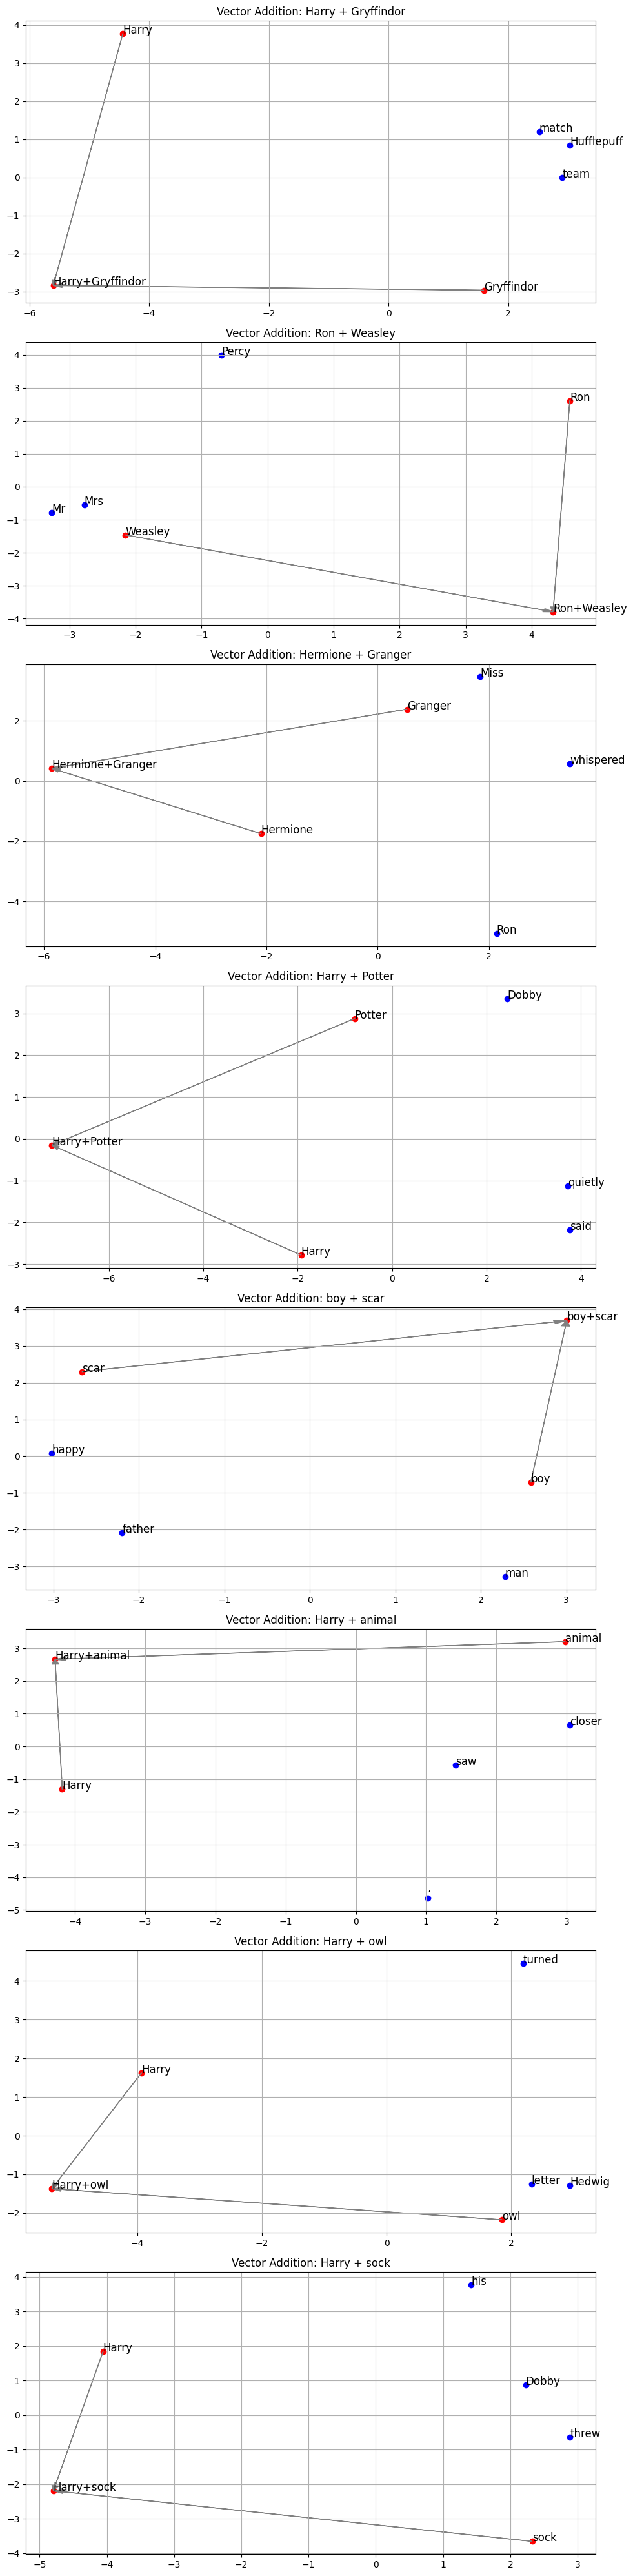

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

def word_addition(word_a, word_b, top_k=5):
    """Compute the sum vector and top-k similar words."""
    if not all(w in word2idx for w in [word_a, word_b]):
        return None, None, None
    
    vec_a = word_embeddings[word2idx[word_a]]
    vec_b = word_embeddings[word2idx[word_b]]
    vec_sum = vec_a + vec_b

    similarities = []
    for word, idx in word2idx.items():
        if word in [word_a, word_b]:
            continue
        vec = word_embeddings[idx]
        sim = np.dot(vec_sum, vec) / (np.linalg.norm(vec_sum) * np.linalg.norm(vec))
        similarities.append((word, sim))
    
    top_similar = sorted(similarities, key=lambda x: x[1], reverse=True)[:top_k]
    return vec_a, vec_b, vec_sum, top_similar

def visualize_multiple_additions(word_pairs, top_k=3):
    n = len(word_pairs)
    fig, axes = plt.subplots(nrows=n, figsize=(10, 5 * n))

    if n == 1:
        axes = [axes]  # Ensure axes is always iterable

    for ax, (word_a, word_b) in zip(axes, word_pairs):
        vec_a, vec_b, vec_sum, top_similar = word_addition(word_a, word_b, top_k)
        if vec_a is None:
            ax.set_title(f"{word_a} + {word_b}: One or more words not in vocab")
            continue

        # Collect vectors and labels
        words = [word_a, word_b, f"{word_a}+{word_b}"] + [w for w, _ in top_similar]
        vectors = [vec_a, vec_b, vec_sum] + [word_embeddings[word2idx[w]] for w, _ in top_similar]

        # PCA for 2D
        pca = PCA(n_components=2)
        vectors_2d = pca.fit_transform(vectors)

        # Plot words
        for i, word in enumerate(words):
            x, y = vectors_2d[i]
            color = 'red' if i < 3 else 'blue'
            ax.scatter(x, y, color=color)
            ax.annotate(word, (x, y), fontsize=12)

        # Draw arrows from A and B to A+B
        ax.arrow(*vectors_2d[0], *(vectors_2d[2] - vectors_2d[0]), 
                 head_width=0.1, length_includes_head=True, color='gray')
        ax.arrow(*vectors_2d[1], *(vectors_2d[2] - vectors_2d[1]), 
                 head_width=0.1, length_includes_head=True, color='gray')

        ax.set_title(f"Vector Addition: {word_a} + {word_b}")
        ax.grid(True)

    plt.tight_layout()
    plt.show()

# Define word pairs to visualize
word_pairs = [
    ("Harry", "Gryffindor"),
    ("Ron", "Weasley"),
    ("Hermione", "Granger"),
    ("Harry", "Potter"),
    ("boy", "scar"),
    ("Harry", "animal"),
    ("Harry", "owl"),
    ("Harry", "sock"),
]

visualize_multiple_additions(word_pairs)


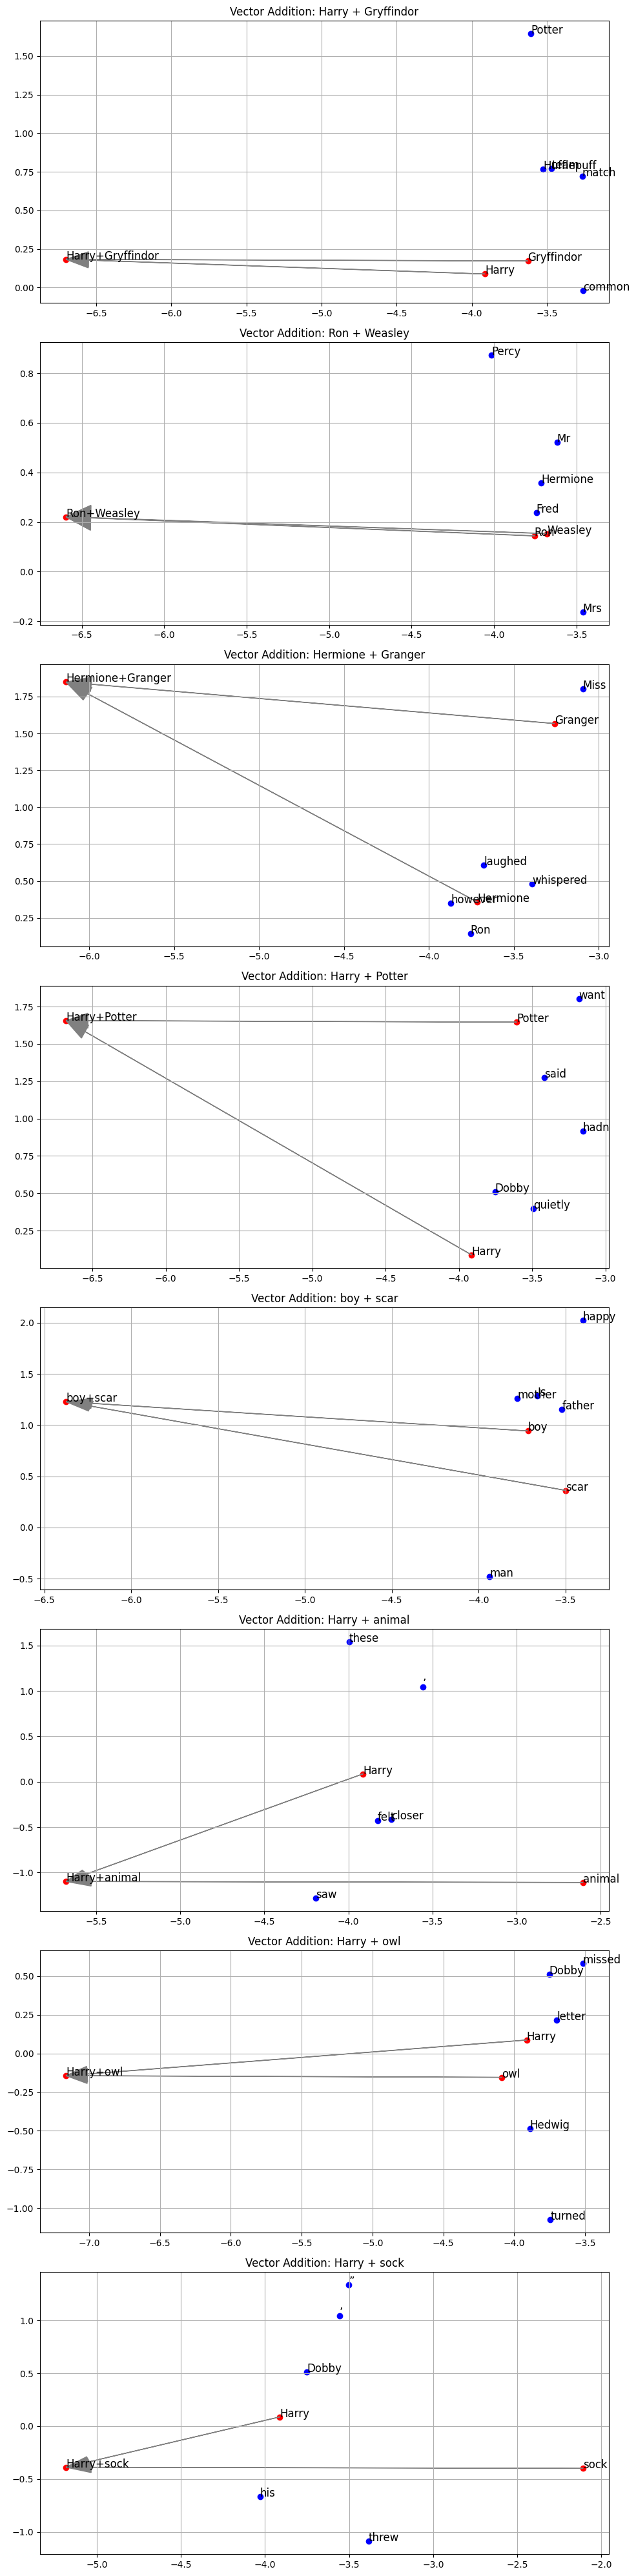

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

def word_addition(word_a, word_b, top_k=5):
    """Compute the sum vector and top-k similar words."""
    if not all(w in word2idx for w in [word_a, word_b]):
        return None, None, None
    
    vec_a = word_embeddings[word2idx[word_a]]
    vec_b = word_embeddings[word2idx[word_b]]
    vec_sum = vec_a + vec_b

    similarities = []
    for word, idx in word2idx.items():
        if word in [word_a, word_b]:
            continue
        vec = word_embeddings[idx]
        sim = np.dot(vec_sum, vec) / (np.linalg.norm(vec_sum) * np.linalg.norm(vec))
        similarities.append((word, sim))
    
    top_similar = sorted(similarities, key=lambda x: x[1], reverse=True)[:top_k]
    return vec_a, vec_b, vec_sum, top_similar

def visualize_multiple_additions(word_pairs, top_k=5):
    n = len(word_pairs)
    fig, axes = plt.subplots(nrows=n, figsize=(10, 5 * n))

    # Train PCA on all embeddings (global transformation)
    pca = PCA(n_components=2)
    pca.fit(word_embeddings)  # word_embeddings: shape (vocab_size, embedding_dim)

    if n == 1:
        axes = [axes]  # Ensure axes is always iterable

    for ax, (word_a, word_b) in zip(axes, word_pairs):
        vec_a, vec_b, vec_sum, top_similar = word_addition(word_a, word_b, top_k)
        if vec_a is None:
            ax.set_title(f"{word_a} + {word_b}: One or more words not in vocab")
            continue

        # Collect vectors and labels
        words = [word_a, word_b, f"{word_a}+{word_b}"] + [w for w, _ in top_similar]
        vectors = [vec_a, vec_b, vec_sum] + [word_embeddings[word2idx[w]] for w, _ in top_similar]

        # Apply the previously trained PCA transformation
        vectors_2d = pca.transform(vectors)

        # Plot words
        for i, word in enumerate(words):
            x, y = vectors_2d[i]
            color = 'red' if i < 3 else 'blue'
            ax.scatter(x, y, color=color)
            ax.annotate(word, (x, y), fontsize=12)

        # Draw arrows from A and B to A+B
        ax.arrow(*vectors_2d[0], *(vectors_2d[2] - vectors_2d[0]), 
                 head_width=0.1, length_includes_head=True, color='gray')
        ax.arrow(*vectors_2d[1], *(vectors_2d[2] - vectors_2d[1]), 
                 head_width=0.1, length_includes_head=True, color='gray')

        ax.set_title(f"Vector Addition: {word_a} + {word_b}")
        ax.grid(True)

    plt.tight_layout()
    plt.show()

# Define word pairs to visualize
word_pairs = [
    ("Harry", "Gryffindor"),
    ("Ron", "Weasley"),
    ("Hermione", "Granger"),
    ("Harry", "Potter"),
    ("boy", "scar"),
    ("Harry", "animal"),
    ("Harry", "owl"),
    ("Harry", "sock"),
]

visualize_multiple_additions(word_pairs)
